# Part 1‑ Exploratory data analysis

In [57]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_json('logins.json')
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [34]:
df.login_time.min()

Timestamp('1970-01-01 20:12:16')

In [35]:
df.login_time.max()

Timestamp('1970-04-13 18:57:38')

In [36]:
df = df.set_index(['login_time'])
df['count'] = 0
df = df.resample('15T').count()
df = df.reset_index()
df.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


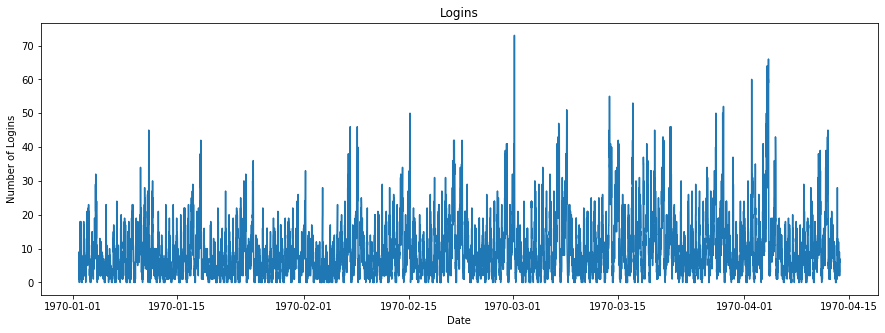

In [40]:
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.title('Logins')

plt.plot(df['login_time'], df['count'])
plt.show()

Text(0.5, 1.0, 'Logins by Day of Week')

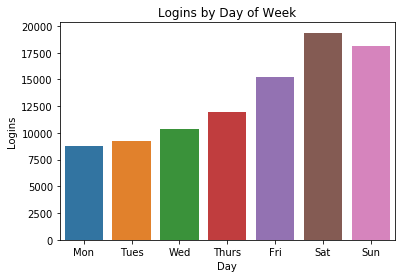

In [45]:
# break logins into days of week
df['day_of_week'] = df.login_time.dt.dayofweek

df_wkd = df.sort_values(by = 'count', ascending = False)

df_wkd = df_wkd[['day_of_week', 'count']]
df_wkd = df_wkd.groupby('day_of_week').sum().reset_index()

df_wkd.day_of_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

sns.barplot(x = 'day_of_week', y = 'count', data = df_wkd)
plt.xlabel('Day')
plt.ylabel('Logins')
plt.title('Logins by Day of Week')

Friday, Saturday and Sunday have more logins.

In [47]:
df['hour'] = df.login_time.dt.hour
hours = df[['hour', 'count']]
hours = hours.groupby('hour').sum().reset_index()

In [48]:
# Monday
mon = df[df.day_of_week == 0]

mon_hours = mon[['hour', 'count']]
mon_hours = mon_hours.groupby('hour').sum().reset_index()

In [49]:
# Tues
tues = df[df.day_of_week == 1]

tues_hours = tues[['hour', 'count']]
tues_hours = tues_hours.groupby('hour').sum().reset_index()

In [50]:
# Wed
wed = df[df.day_of_week == 2]

wed_hours = wed[['hour', 'count']]
wed_hours = wed_hours.groupby('hour').sum().reset_index()

In [51]:
# Thurs
thurs = df[df.day_of_week == 3]

thurs_hours = thurs[['hour', 'count']]
thurs_hours = thurs_hours.groupby('hour').sum().reset_index()

In [52]:
# Fri
fri = df[df.day_of_week == 4]

fri_hours = fri[['hour', 'count']]
fri_hours = fri_hours.groupby('hour').sum().reset_index()

In [53]:
# Sat
sat = df[df.day_of_week == 5]

sat_hours = sat[['hour', 'count']]
sat_hours = sat_hours.groupby('hour').sum().reset_index()

In [54]:
# Sun
sun = df[df.day_of_week == 6]

sun_hours = sun[['hour', 'count']]
sun_hours = sun_hours.groupby('hour').sum().reset_index()

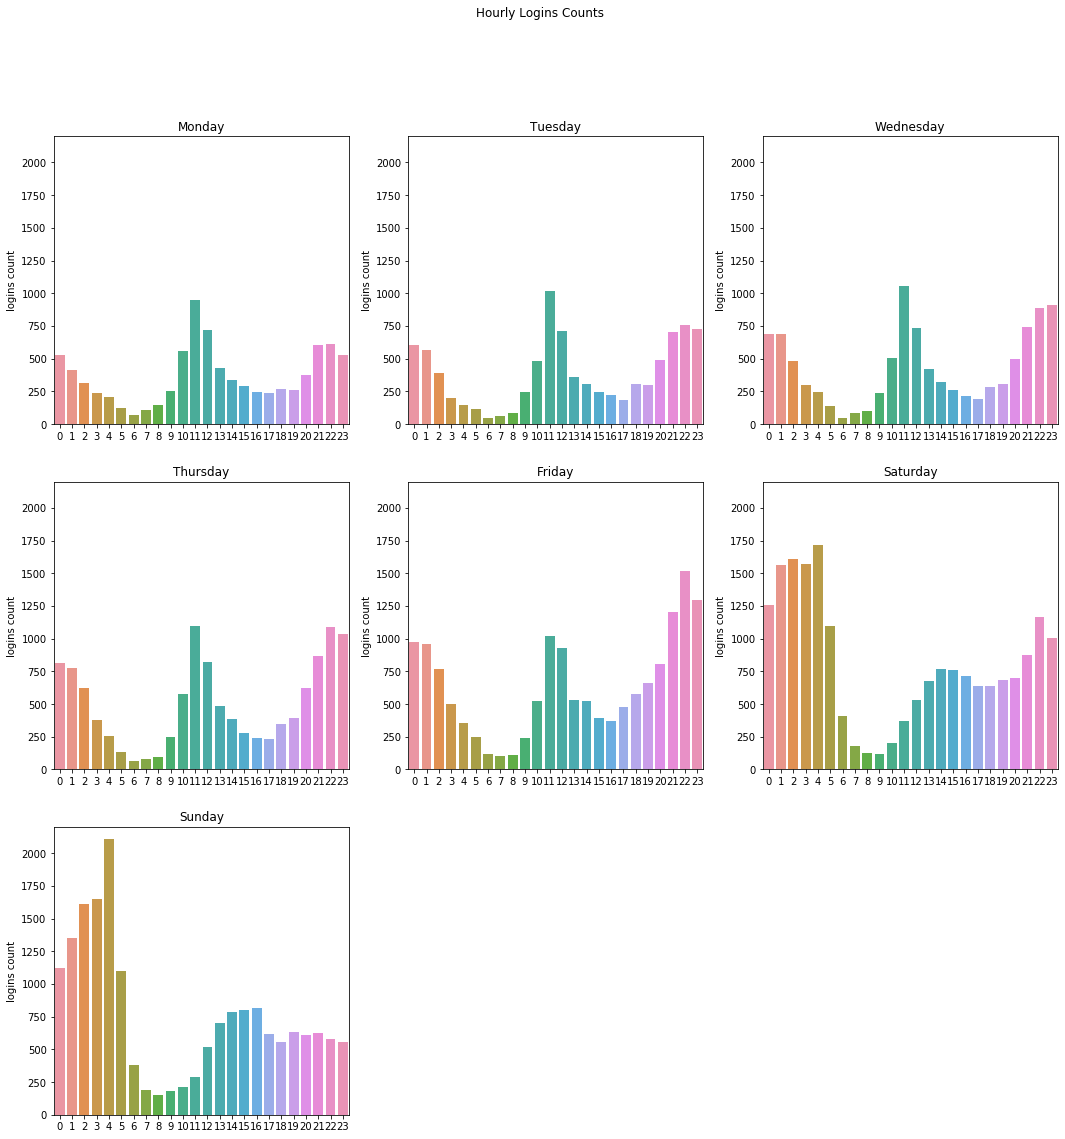

In [55]:
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(3,3,1)
sns.barplot(x = 'hour', y = 'count', data = mon_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Monday')

ax = fig.add_subplot(3,3,2)
sns.barplot(x = 'hour', y = 'count', data = tues_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Tuesday')

ax = fig.add_subplot(3,3,3)
sns.barplot(x = 'hour', y = 'count', data = wed_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Wednesday')

ax = fig.add_subplot(3,3,4)
sns.barplot(x = 'hour', y = 'count', data = thurs_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Thursday')

ax = fig.add_subplot(3,3,5)
sns.barplot(x = 'hour', y = 'count', data = fri_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Friday')

ax = fig.add_subplot(3,3,6)
sns.barplot(x = 'hour', y = 'count', data = sat_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Saturday')

ax = fig.add_subplot(3,3,7)
sns.barplot(x = 'hour', y = 'count', data = sun_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Sunday')

plt.suptitle('Hourly Logins Counts');

On weekdays, longins ususaly peak around noon time. At weekends, logins usually peak around midnight.

# Part 2 ‑ Experiment and metrics design

1.The key metric I will use is there an increase of cars entering the bridge from Gotham AND during the night is there an increase of cars entering the bridge from Metropolis.

2.I will use two hypothesis tests:

HO: There is no difference between the mean number of cars entering the bridge from Gotham during weekdays between 6 am and 6 pm, before and after reimbursements were offered.
HA: There is an increase in the mean number of cars entering the bridge from Gotham during weekdays between 6 am and 6 pm, before and after reimbursements were offered.

HO: There is no difference between the mean number of cars entering the bridge from Metropolis during weekdays between 7 pm and 5 am, before and after reimbursements were offered.
HA: There is an increase in the mean number of cars entering the bridge from Metropolis during weekdays between 7 pm and 5 am, before and after reimbursements were offered..

I will use one-tailed z-test. 

If both test p-value are less than 0.05 then we can reject the null hypotheses and reimbursing all toll costs.
If both test p-value are greater than 0.05 then we cannot reject the null hypotheses and not reimbursing all toll costs.

# Part 3 ‑ Predictive modeling

In [78]:
file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [80]:
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver).mean()
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver).mean()

In [81]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [82]:
df.phone = df.phone.fillna('iPhone')

In [83]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [85]:
earliest_signup = df.signup_date.min()
latest_signup = df.signup_date.max()
signups_ct = df.signup_date.count()
last_trip = df.last_trip_date.max()

print('There were {} signups between {} and {}'.format(signups_ct, earliest_signup, latest_signup))
print('Last trip: {}'.format(last_trip))

There were 50000 signups between 2014-01-01 00:00:00 and 2014-01-31 00:00:00
Last trip: 2014-07-01 00:00:00


In [86]:
df['retained'] =  df.last_trip_date >= '2014-06-01 00:00:00'
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.601559,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,4.778158,True
1,Astapor,0,2014-01-29,4.601559,1.00,2014-05-05,Android,0.0,False,50.0,8.26,4.778158,False
2,Astapor,3,2014-01-06,4.601559,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,4.778158,False
3,King's Landing,9,2014-01-10,4.601559,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.778158,True
4,Winterfell,14,2014-01-27,4.601559,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.778158,False


In [87]:
ph_ret = df[['retained', 'phone']].groupby('phone').sum().reset_index()
ph_ret

all_android = df[df.phone == 'Android'].phone.count()
all_android

all_iphone = df[df.phone == 'iPhone'].phone.count()
all_iphone

ph_ret['percent'] = 0

ph_ret.iloc[0, 2] = ph_ret.loc[0, 'retained'] / all_android * 100
ph_ret.iloc[1, 2] = ph_ret.loc[1, 'retained'] / all_iphone * 100

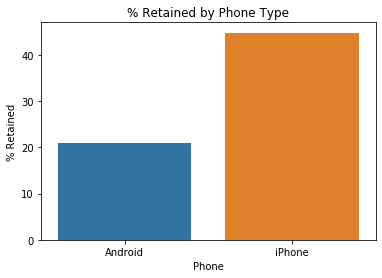

In [88]:
sns.barplot(x = 'phone', y = 'percent', data = ph_ret)
plt.xlabel('Phone')
plt.ylabel('% Retained')
plt.title('% Retained by Phone Type');

In [89]:
city = df[['retained', 'city']].groupby('city').sum().reset_index()

city_total = df[['retained', 'city']].groupby('city').count().reset_index()

city = city.merge(city_total, on = 'city')
city.columns = ['city', 'retained', 'total']
city['percent'] = city.retained / city.total * 100

Text(0.5, 1.0, '% Retained by City')

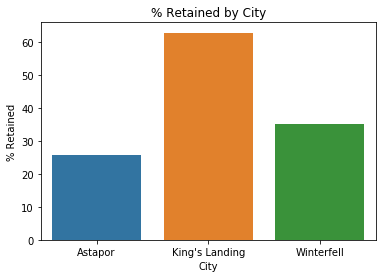

In [90]:
sns.barplot(x = 'city', y = 'percent', data = city)
plt.xlabel('City')
plt.ylabel('% Retained')
plt.title('% Retained by City')

In [91]:
df = df.drop(['last_trip_date', 'signup_date'], axis = 1)
df = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.601559,1.10,15.4,46.2,3.67,4.778158,True,0,1,0,0,1,0,1
1,0,4.601559,1.00,0.0,50.0,8.26,4.778158,False,1,0,0,1,0,1,0
2,3,4.601559,1.00,0.0,100.0,0.77,4.778158,False,1,0,0,0,1,1,0
3,9,4.601559,1.14,20.0,80.0,2.36,4.778158,True,0,1,0,0,1,0,1
4,14,4.601559,1.19,11.8,82.4,3.13,4.778158,False,0,0,1,1,0,1,0


In [93]:
y = df.retained
df = df.drop('retained', axis = 1)
df = df.join(y)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,retained
0,4,4.601559,1.10,15.4,46.2,3.67,4.778158,0,1,0,0,1,0,1,True
1,0,4.601559,1.00,0.0,50.0,8.26,4.778158,1,0,0,1,0,1,0,False
2,3,4.601559,1.00,0.0,100.0,0.77,4.778158,1,0,0,0,1,1,0,False
3,9,4.601559,1.14,20.0,80.0,2.36,4.778158,0,1,0,0,1,0,1,True
4,14,4.601559,1.19,11.8,82.4,3.13,4.778158,0,0,1,1,0,1,0,False


In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [94]:
X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

C:\Users\17520-1906\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7143
              precision    recall  f1-score   support

       False       0.74      0.84      0.79      9379
        True       0.66      0.50      0.57      5621

    accuracy                           0.71     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.71      0.70     15000



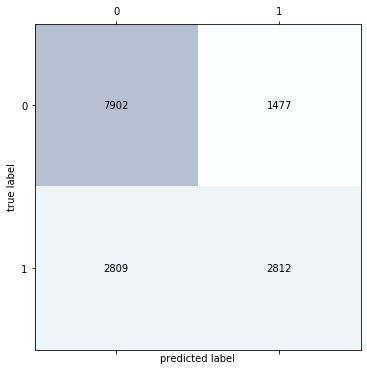

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

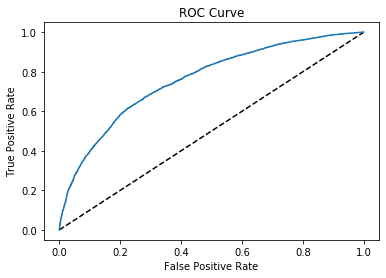

In [96]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [97]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7591328927197312


# KNN

Accuracy: 0.7479
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      9379
        True       0.67      0.64      0.65      5621

    accuracy                           0.75     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000



Text(0, 0.5, 'true label')

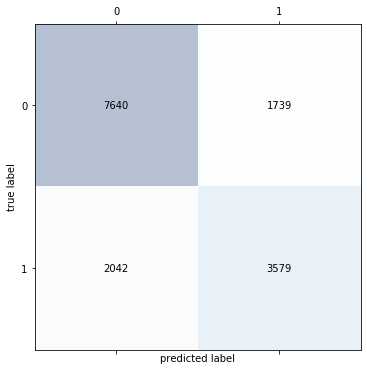

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

Text(0, 0.5, 'Accuracy')

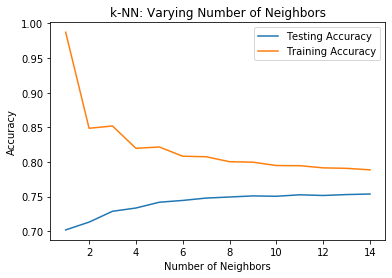

In [99]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(n_neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

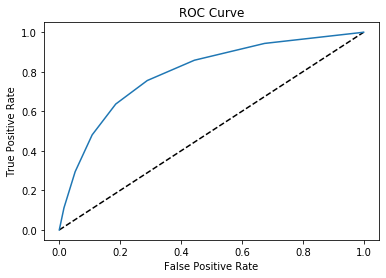

In [102]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [103]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7944333977960545


# SVM

C:\Users\17520-1906\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7614
              precision    recall  f1-score   support

       False       0.79      0.85      0.82      9379
        True       0.71      0.62      0.66      5621

    accuracy                           0.76     15000
   macro avg       0.75      0.73      0.74     15000
weighted avg       0.76      0.76      0.76     15000



Text(0, 0.5, 'true label')

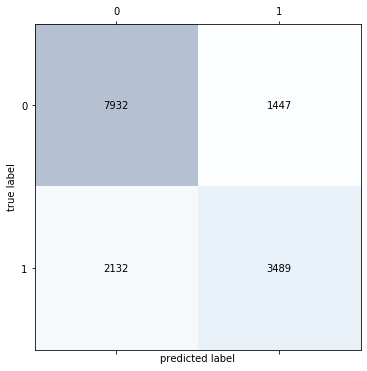

In [104]:
from sklearn import svm

SVM = svm.SVC(random_state=42,probability=True)
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

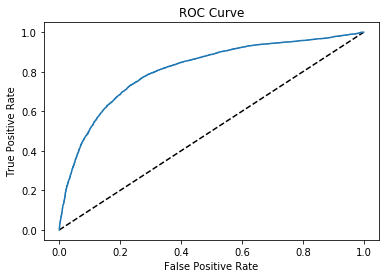

In [105]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = SVM.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [106]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = SVM.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8106648166947554


# Naive Bayes

Accuracy: 0.7163
              precision    recall  f1-score   support

       False       0.79      0.75      0.77      9379
        True       0.61      0.66      0.64      5621

    accuracy                           0.72     15000
   macro avg       0.70      0.71      0.70     15000
weighted avg       0.72      0.72      0.72     15000



Text(0, 0.5, 'true label')

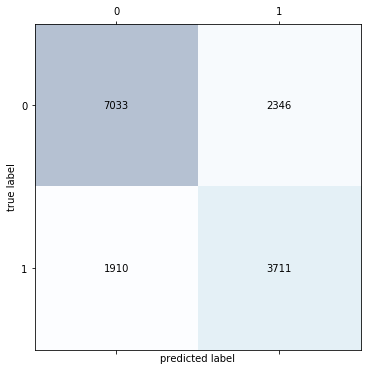

In [107]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

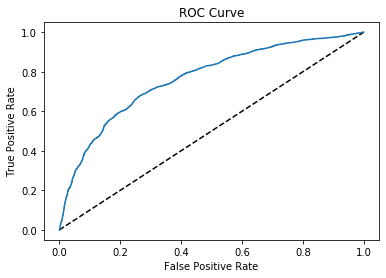

In [108]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = NB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [109]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = NB.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7649155692503773


# AdaBoost

Accuracy: 0.7583
              precision    recall  f1-score   support

       False       0.78      0.85      0.81      9379
        True       0.71      0.60      0.65      5621

    accuracy                           0.76     15000
   macro avg       0.74      0.73      0.73     15000
weighted avg       0.75      0.76      0.75     15000



Text(0, 0.5, 'true label')

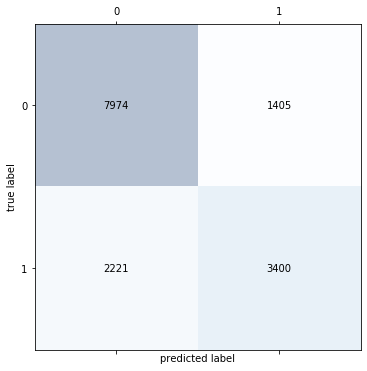

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate a Decision Tree
dt = DecisionTreeClassifier(max_depth = 2, random_state=42)

# instantate and fit an AdaBoost Classifier
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 5, random_state = 42)
adb.fit(X_train, y_train)

# make predictions on the test set
y_pred = adb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

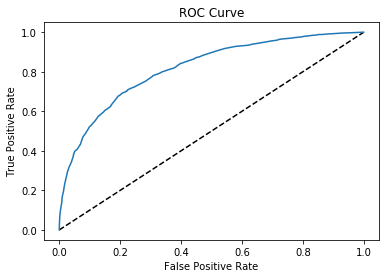

In [111]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = adb.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [112]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = adb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8175769929220877


# XGBoost

Accuracy: 0.7471
              precision    recall  f1-score   support

       False       0.76      0.88      0.81      9379
        True       0.72      0.53      0.61      5621

    accuracy                           0.75     15000
   macro avg       0.74      0.70      0.71     15000
weighted avg       0.74      0.75      0.74     15000



Text(0, 0.5, 'true label')

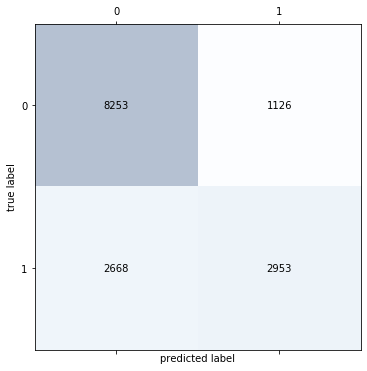

In [113]:
import xgboost as xgb

XGB = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42)
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

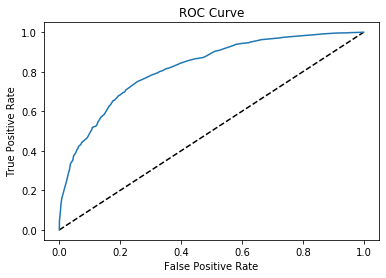

In [114]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = XGB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [115]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = XGB.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8194824694283556


# Random Forest

Accuracy: 0.7322
              precision    recall  f1-score   support

       False       0.79      0.78      0.78      9379
        True       0.64      0.65      0.65      5621

    accuracy                           0.73     15000
   macro avg       0.71      0.72      0.72     15000
weighted avg       0.73      0.73      0.73     15000



Text(0, 0.5, 'true label')

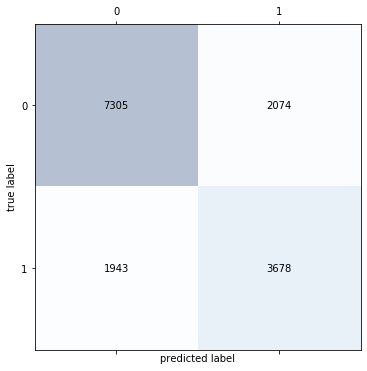

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

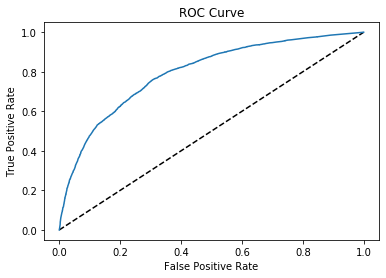

In [119]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [120]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7948919864522631


# LightGBM

Accuracy: 0.7831
              precision    recall  f1-score   support

       False       0.81      0.85      0.83      9379
        True       0.73      0.67      0.70      5621

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



Text(0, 0.5, 'true label')

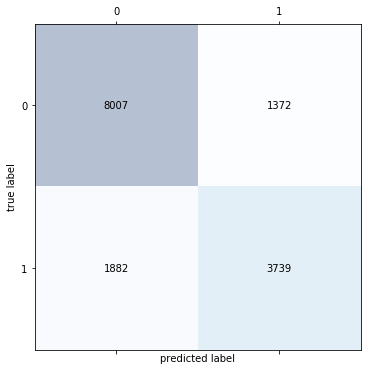

In [122]:
import lightgbm as lg

lgbm = lg.LGBMClassifier(seed=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

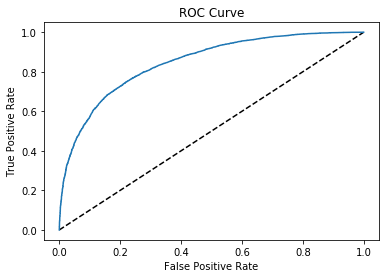

In [124]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [126]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8467078952913671


# Hyperparameter Tuning

In [129]:
learning_rate = [0.5, 0.25, 0.1]
max_bin = [64, 200, 400]
num_leaves = [32, 64, 100]
max_depth = [11, 14, 17]
min_data_in_leaf = [40, 160, 320]

param_grid = {'learning_rate': learning_rate,        
               'max_bin' : max_bin,
               'max_depth': max_depth,
               'num_leaves': num_leaves,                         
               'min_data_in_leaf': min_data_in_leaf
               }

In [130]:
lgbm = lg.LGBMClassifier(seed=42)
lgbm_final = GridSearchCV(estimator = lgbm, param_grid = param_grid, cv = 5, n_jobs = -1)

lgbm_final.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, seed=42, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.25, 0.1],
                 

In [131]:
lgbm_final.best_params_, lgbm_final.best_score_

({'learning_rate': 0.1,
  'max_bin': 64,
  'max_depth': 14,
  'min_data_in_leaf': 40,
  'num_leaves': 32},
 0.7886)

Accuracy: 0.7826
              precision    recall  f1-score   support

       False       0.81      0.85      0.83      9379
        True       0.73      0.67      0.70      5621

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



Text(0, 0.5, 'true label')

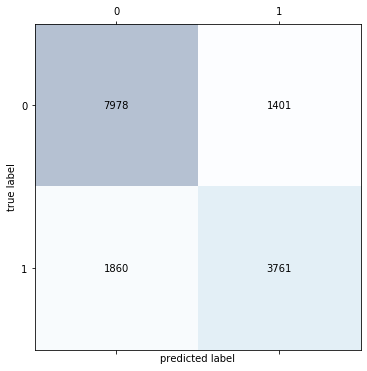

In [132]:
lgbm = lg.LGBMClassifier(learning_rate = 0.1, max_bin = 64, max_depth = 14, min_data_in_leaf = 40, num_leaves = 32, seed=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

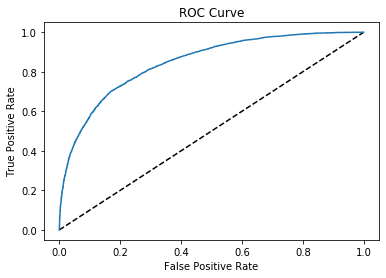

In [133]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [134]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8471352430517981


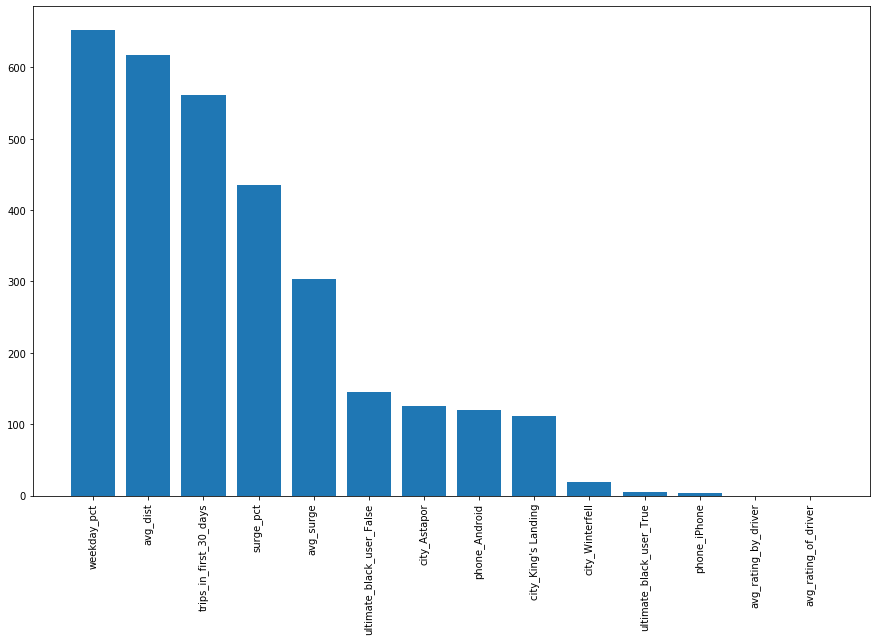

In [135]:
# calculate feature importances
importances = lgbm.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (15, 9))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation = 90);